# Random Forest - Formal Modeling - Part 1

In [1]:
import io, os, sys, types
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
import nbformat

from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

In [3]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [4]:
class NotebookLoader(object):
    """Module Loader for IPython Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing notebook from %s" % path)
                                       
        # load the notebook object
        nb = nbformat.read(path, as_version=4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [5]:
class NotebookFinder(object):
    """Module finder that locates IPython Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [6]:
sys.meta_path.append(NotebookFinder())

importing notebook from EDA.ipynb
['Station' 'Date' 'Tmax' 'Tmin' 'Tavg' 'Depart' 'DewPoint' 'WetBulb' 'Heat'
 'Cool' 'Sunrise' 'Sunset' 'CodeSum' 'Depth' 'Water1' 'SnowFall'
 'PrecipTotal' 'StnPressure' 'SeaLevel' 'ResultSpeed' 'ResultDir'
 'AvgSpeed']
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall      

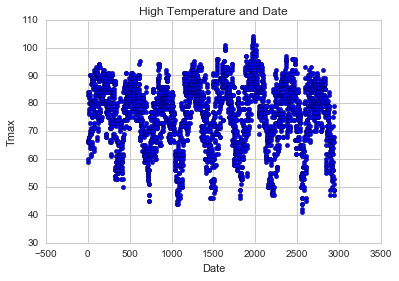

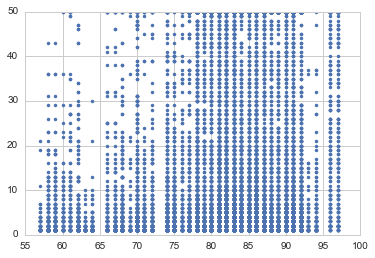

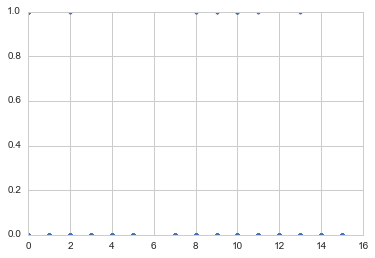

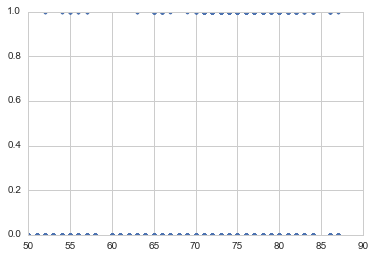

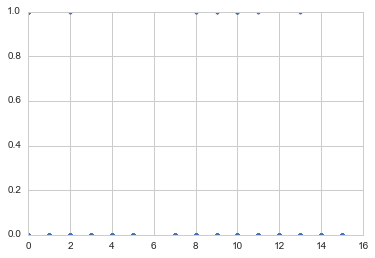

Numerical columns:
set(['AddressNumberAndStreet_7900  S CHICAGO AVE, Chicago, IL', 'Street_ E 111TH ST', 'Street_ S CALIFORNIA', 'Trap_T081', 'Address_5800 North Pulaski Road, Chicago, IL 60646, USA', 'Trap_T083', 'Station', 'Trap_T085', 'Trap_T084', 'Trap_T086', 'AddressNumberAndStreet_1100  S STATE ST, Chicago, IL', 'Trap_T088', 'Address_6500 North Oak Park Avenue, Chicago, IL 60631, USA', 'Address_1100 Roosevelt Road, Chicago, IL 60608, USA', 'Tmin', 'Trap_T160', 'Trap_T161', 'Street_ W GRANVILLE AVE', 'StnPressure', 'AddressNumberAndStreet_1500  N LONG AVE, Chicago, IL', 'Street_ S AVENUE G', 'Street_ S CORNELL AVE', 'Address_3900 North Springfield Avenue, Chicago, IL 60618, USA', 'Street_ S AVENUE L', 'Street_ W GREENLEAF AVE', 'AddressNumberAndStreet_2100  S HAMLIN AVE, Chicago, IL', 'AddressNumberAndStreet_2500  S THROOP, Chicago, IL', 'Street_ W MONTROSE DR', 'Trap_T018', 'Trap_T019', 'Street_ S STONY ISLAND AVE', 'Trap_T012', 'Trap_T013', 'AddressNumberAndStreet_1300  S TORREN

In [7]:
import EDA

In [8]:
joined_data = EDA.joined_data

In [9]:
joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [10]:
final_numeric_data = EDA.final_numeric_data

# Feature/Target Setup

In [11]:
# Set features to use
features = ['Tavg', 'Heat', 'DewPoint', 'PrecipTotal', 'Tmax', 'Tmin'] + \
           filter(lambda x: x.startswith('Species_'), EDA.final_numeric_data.columns) + \
           filter(lambda x: x.startswith('AddressNumberAndStreet_'), EDA.final_numeric_data.columns)

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = final_numeric_data[features]
y = final_numeric_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

Notice that we have several weather features in addition to species of mosquitos and AddressNumberAndStreet. 

# Random Forest Model

In [12]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Note that we are including the class_weight as being balanced since there is a lot of data points where the virus was not present. 

In [13]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.964
Accuracy: 0.919


Since the accuracy of both training and testing data are close, it's one indicator that we are not overfitting the data. 

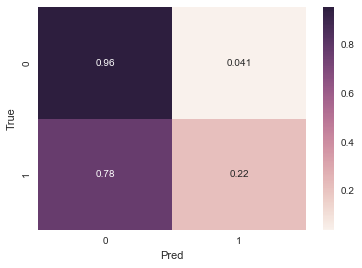

Confusion Matrix:
[[7621  326]
 [ 357  101]]


In [14]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

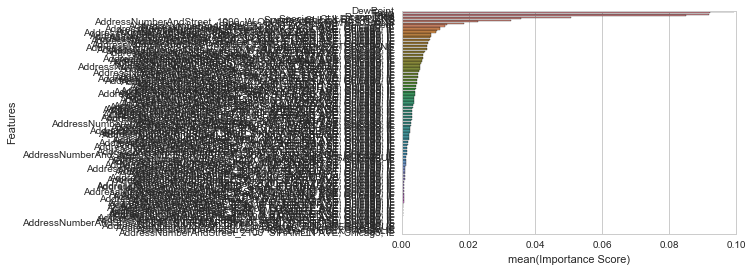

In [15]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [16]:
# look at the top 10 features
features_list = features.tolist()
feature_importances_list = feature_importances.tolist()

features_dictionary = []
count = 0
for feature_importance in features_list:
    feature_info = []
    feature_info.append(feature_importance)
    feature_info.append(feature_importances[count])
    count += 1
    #print feature_info
    features_dictionary.append(feature_info)

In [17]:
# top 10 features
top_10_features = []
count = 0
# get the top 10 features
while count < 10:
    #top_10_features.append(features_dictionary[count])
    top_10_features.append(features_dictionary[count][0])
    count += 1

In [18]:
top_10_features

['Tavg',
 'Heat',
 'DewPoint',
 'PrecipTotal',
 'Tmax',
 'Tmin',
 'Species_CULEX ERRATICUS',
 'Species_CULEX PIPIENS',
 'Species_CULEX PIPIENS/RESTUANS',
 'Species_CULEX RESTUANS']

In [29]:
len(features_list)

151

In [19]:
# Rerun model 
# Set features to use
features = top_10_features

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = final_numeric_data[features]
y = final_numeric_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.756
Accuracy: 0.752


As expected, the accuracy of the model decreased using less features. There was less information available to the model. 

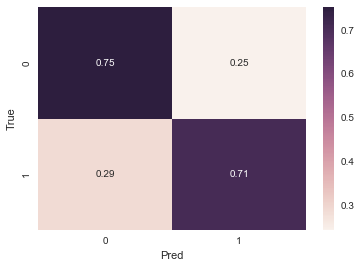

Confusion Matrix:
[[5997 1950]
 [ 133  325]]


In [22]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

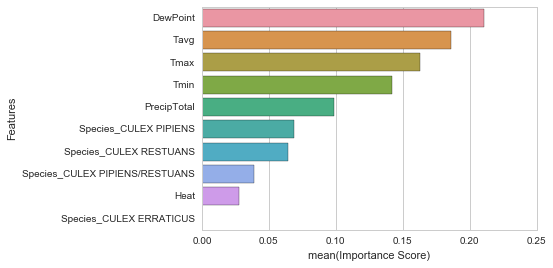

In [23]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

Note that we can see the most important features in the model. 

# Tune Parameters

In [24]:
# reset X_train and y_train
# Set features to use
features = ['Tavg', 'Heat', 'DewPoint', 'PrecipTotal', 'Tmax', 'Tmin'] + \
           filter(lambda x: x.startswith('Species_'), EDA.final_numeric_data.columns) + \
           filter(lambda x: x.startswith('AddressNumberAndStreet_'), EDA.final_numeric_data.columns)

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = final_numeric_data[features]
y = final_numeric_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [26]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Best Params:
{'n_estimators': 200}
Accuracy of current model: 0.919
Accuracy using best param: 0.949


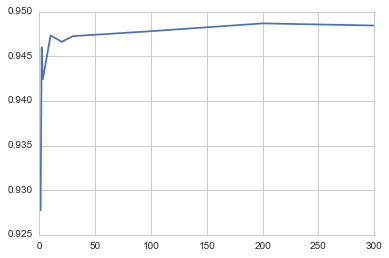

In [27]:
# n_estimators - number of trees in the forest
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}
#f = [1, 2, 3, 4]


# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

Best Params:
{'max_features': 60}
Accuracy of current model: 0.919
Accuracy using best param: 0.949


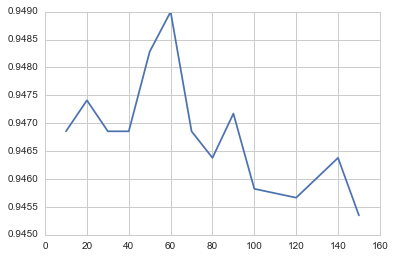

In [30]:
# max_features - size of random subsets of features to consider when splitting a node
# Set list of values to grid search over
f = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150]
params = {'max_features': f}
#f = [1, 2, 3, 4]


# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(f, [s[1] for s in gs.grid_scores_])

# Update Parameters

In [31]:
# Instantiate updated model
rf = ensemble.RandomForestClassifier(n_estimators=200, class_weight="balanced", max_features=60)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=60,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.965
Accuracy: 0.912


In [33]:
# Train the Improved Model
# Set features to use
features = ['Tavg', 'Heat', 'DewPoint', 'PrecipTotal', 'Tmax', 'Tmin'] + \
           filter(lambda x: x.startswith('Species_'), EDA.final_numeric_data.columns) + \
           filter(lambda x: x.startswith('AddressNumberAndStreet_'), EDA.final_numeric_data.columns)

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = final_numeric_data[features]
y = final_numeric_data[target]

# Create separate training and test sets with 60/40 train/test split
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)
X_train = final_numeric_data[features]
y_train = final_numeric_data[target]

In [34]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=200, class_weight="balanced", max_features=60)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=60,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

Accuracy: 0.955


# Predict with Test Data

In [36]:
import TestData

importing notebook from TestData.ipynb


In [37]:

# Load data
test_data = TestData.final_numeric_test_data

# Create DF for submission
#df_sub = df_test[['Id']]



# Check data
test_data.head()

#df_sub = df_test[['Id']]



,Id,Block,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,Depart,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,1,41,41.95469,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,41,41.95469,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,41,41.95469,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,41,41.95469,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,41,41.95469,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test_data_sub = test_data[['Id']]

In [ ]:
test_data_sub

In [40]:
# Predict using tuned model
# Set X and y
# Set features to use
features = ['Tavg', 'Heat', 'DewPoint', 'PrecipTotal', 'Tmax', 'Tmin'] + \
           filter(lambda x: x.startswith('Species_'), EDA.final_numeric_data.columns) + \
           filter(lambda x: x.startswith('AddressNumberAndStreet_'), EDA.final_numeric_data.columns)

# Set target variable name
target = 'WnvPresent'

# Set X 
#X_test = TestData.final_numeric_test_data[features]



# Instantiate model
tf = ensemble.RandomForestClassifier(n_estimators=200, class_weight="balanced", max_features=60)

# Train model on training set
#tf.fit(X_train, y_train)

#test_data['WnvPresent'] = tf.predict(X_test)

#

In [41]:
test_data

,Id,Block,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,Depart,...,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent
0,1,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,4,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,4,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,5,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,5,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [43]:
test_data['WnvPresent_Probability'] = tf.predict(X_test)

In [44]:
test_data

,Id,Block,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,Tavg,Depart,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent,WnvPresent_Probability
0,1,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,3,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,3,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,4,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,4,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,5,41,41.954690,-87.800991,9,1,86,61,74,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9,5,41,41.954690,-87.800991,9,2,86,66,76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [45]:
test_data.to_csv("prediction-1.csv", index=False)